1st Method - Differential Equations

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Proportional Gain
K = 3
# Time Constant
T = 4

t_start = 0
t_stop = 30

#Time increment
increment = 0.1

t = np.arange(t_start,t_stop,increment)

# Differential Equation
# y(t) = KU * (1 - exp(-t/T) where U = 1
y = K * (1 - np.exp(-t/T))

plt.plot(t,y)
plt.title('1st Order Dynamic System')
plt.xlabel('t[s]')
plt.ylabel('y(t)')
plt.grid()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

# Initializations

K = 3
T = 4
u = 1

# Time intervals
t_start = 0
t_stop = 30

# Time increment
increment = 1

y0 = 0

t = np.arange(t_start,t_stop,increment)

# System Definition
def order_1_system(y,t,K,T,u):
    dydt = (1/T) * (- y + K*u)
    return dydt

# Solve ODE
y = integrate.odeint(order_1_system,y0,t, args=(K, T, u))
# print(y)

plt.plot(t,y)
plt.title('1st Order Dynamic System using ODE Solver')
plt.xlabel('t[s]')
plt.ylabel('y(t)')
plt.grid()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Initialization of Model Parameters
K = 3
T = 4
a = -1/T
b = K/T

# Simulation Parameters
Ts = 0.1
Tstop = 30
uk = 1              # Step Response
yk = 0              # Initial Condition
N = int(Tstop/Ts)   # Number of Samples or Simulation Length
data = []           # Data Storage
data.append(yk)     

# Simulation
for k in range (N):
    yk1 = (1 + a*Ts)*yk + b*Ts*uk
    yk = yk1
    data.append(yk1)
#print(data)

# Plotting
t = np.arange(0,Tstop+Ts,Ts)
plt.plot(t,data)
plt.title('1st Order Dynamic System using Euler Method')
plt.xlabel('t[s]')
plt.ylabel('y(t)')
plt.grid()

2nd Method - Transfer Functions

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Initialization of Model Parameters
K = 3
T = 4

# Initialization of Transfer Function Variables
numerator = np.array([K])
denominator = np.array([T,1])

# Transfer Function
Hs = ctl.tf(numerator,denominator)
print("H(s) = ", Hs)

# Step Response
t, y = ctl.step_response(Hs)

# Plotting
plt.plot(t,y)
plt.title('1st Order Dynamic System using Transfer Function')
plt.xlabel('t[s]')
plt.ylabel('y(t)')
plt.grid()

3rd Method: State Space Model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

# Initialization of Model Parameters
K = 3
T = 4

t_start = 0
t_stop = 30
step = 1

t = np.arange(t_start,t_stop,step)

# Initialization of simulation parameters
x0 = np.array([[0,0]])

# State Space Model
A = np.array([[-1/T, 0],
              [0, 0]])

B = np.array([[K/T],
              [0]])

C = np.array([[1, 0]])

D = np.array([[0]])

# System Definition
sys = signal.StateSpace(A,B,C,D)

# Conversion to Transfer Function (2 ways) from State Space Model
H = sys.to_tf()
H = signal.ss2tf(A,B,C,D)
#print("H(s) = ", H)

# Step Response using State Space Model
t, y = signal.step(sys, x0, T= t)
# Step response using transfer function
# t,y = signal.step(H, x0, t) 

# Plotting
plt.plot(t,y)
plt.title('1st Order Dynamic System using State Space Model') 
plt.xlabel('t[s]')
plt.ylabel('y(t)')
plt.grid()
plt.show()

Frequency Response of a Dynamic System
- Can be found using the Bode Diagram
- The Bode Diagram can be used to characterize the stability properties of the dynamic system.

H(s) =  TransferFunctionContinuous(
array([0.4, 0.2]),
array([1.        , 0.53333333, 0.06666667]),
dt: None
)
H(s) =  
    6 s + 3
----------------
15 s^2 + 8 s + 1



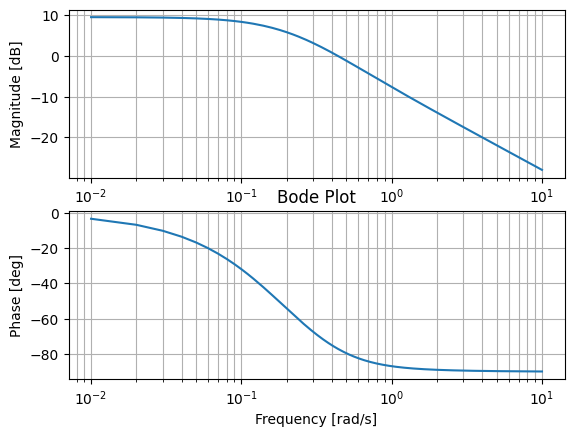

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import control as ctl

# Transfer Function
numerator_1 = np.array([3])
numerator_2 = np.array([2, 1])
numerator = np.convolve(numerator_1,numerator_2)

denominator_1 = np.array([3, 1])
denominator_2 = np.array([5, 1])
denominator = np.convolve(denominator_1,denominator_2)

Hs_1 = signal.TransferFunction(numerator,denominator)
print("H(s) = ", Hs_1)

Hs_2 = ctl.tf(numerator,denominator)
print("H(s) = ", Hs_2)

# Frequencies
w_start = 0.01
w_stop = 10
step = 0.01
N = int((w_stop - w_start)/step) + 1
w = np.linspace(w_start,w_stop,N)

# Bode Plot
w, mag, phase = signal.bode(Hs_1, w)  # Using Scipy
#ctl.bode(Hs_2, w)     # Using Control

#Plotting
plt.figure()

# Magnitude Plot
plt.subplot(2,1,1)
plt.semilogx(w,mag)
plt.grid(visible= None, which = 'major', axis='both')
plt.grid(visible= None, which = 'minor', axis='both')
plt.ylabel('Magnitude [dB]')

# Phase Plot
plt.subplot(2,1,2)
plt.semilogx(w,phase)
plt.grid(visible = None, which = 'major', axis='both')
plt.grid(visible = None, which = 'minor', axis='both')
plt.ylabel('Phase [deg]')

plt.xlabel('Frequency [rad/s]')
plt.title('Bode Plot')
plt.show()


PI Controller Simulations

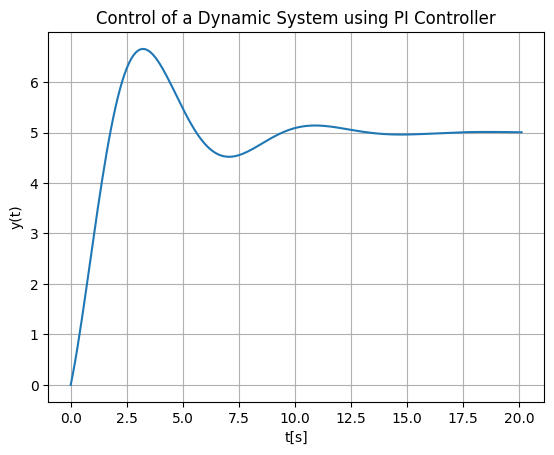

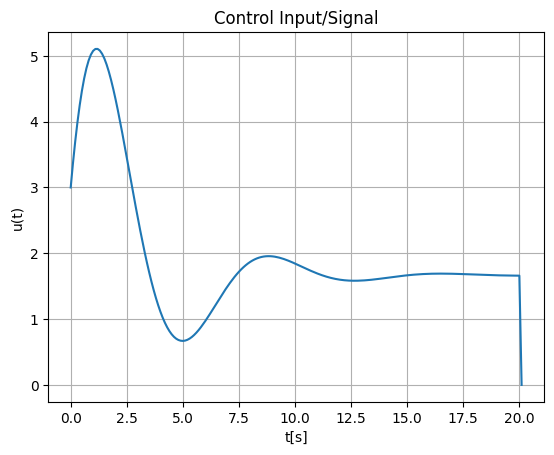

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Initialization of Model Parameters
K = 3
T = 4
a = -(1/T)
b = K/T

# Simulation Parameters
Ts = 0.1
Tstop = 20
N = Tstop/Ts
y = np.zeros(int(N)+2)
y[0] = 0

# PI Controller Parameters (Tuning)
Kp = 0.5
Ti = 5

r = 5                    # Reference
e = np.zeros(int(N)+2)   # Error
u = np.zeros(int(N)+2)   # Control input

# Simulation

# We need to use a for loop to iterate over N samples
for k in range (int(N)+1):
    e[k] = r - y[k]
    u[k] = u[k-1] + Kp*(e[k] - e[k-1]) + Kp*e[k]/Ti
    y[k + 1] = (1 + a*Ts)*y[k] + b*Ts*u[k]

# Plotting
t = np.arange(0,Tstop+2*Ts,Ts)

plt.figure(1)
plt.plot(t,y)
plt.title('Control of a Dynamic System using PI Controller')
plt.xlabel('t[s]')
plt.ylabel('y(t)')
plt.grid()

plt.figure(2)
plt.plot(t,u)
plt.title('Control Input/Signal')
plt.xlabel('t[s]')
plt.ylabel('u(t)')
plt.grid()


Stability Analysis

Hc(s) =  
0.8 s + 0.4
-----------
    2 s

Hp(s) =  
   3
-------
4 s + 1

Hm(s) =  
  1
-----
s + 1

Hf(s) =  
  1
-----
s + 1

L(s) =  
         2.4 s + 1.2
-----------------------------
8 s^4 + 18 s^3 + 12 s^2 + 2 s

T(s) =  
             2.4 s + 1.2
-------------------------------------
8 s^4 + 18 s^3 + 12 s^2 + 4.4 s + 1.2

Poles of T(s) =  [-1.40867554+0.j         -0.61123728+0.j         -0.11504359+0.40121555j
 -0.11504359-0.40121555j]
Zeros of T(s) =  [-0.5+0.j]
Gain Margin =  3.57
Gain Margin =  11.06 dB
Phase Margin =  30.09 deg
Frequency at Phase =  0.77 rad/s
Frequency at Gain =  0.37 rad/s
Kc =  1.43


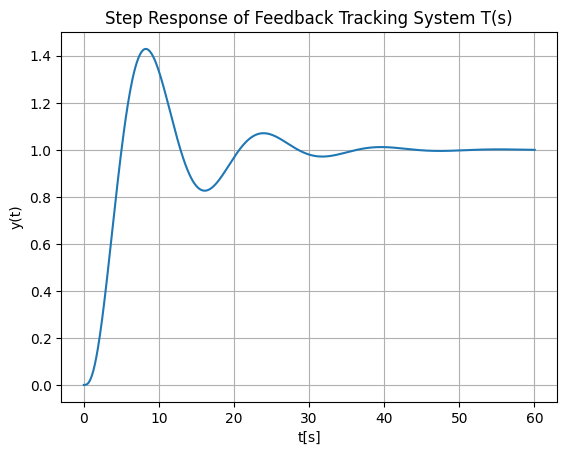

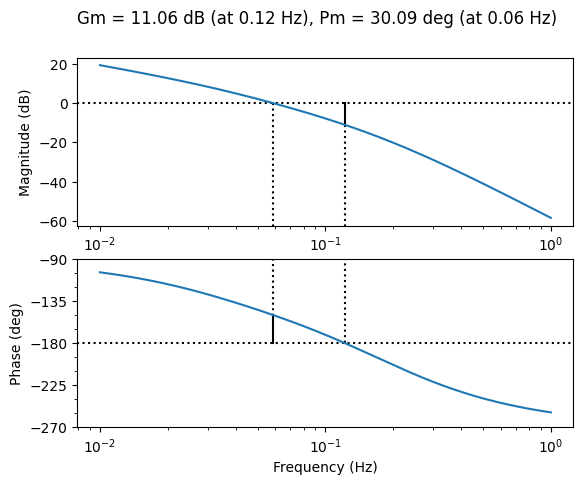

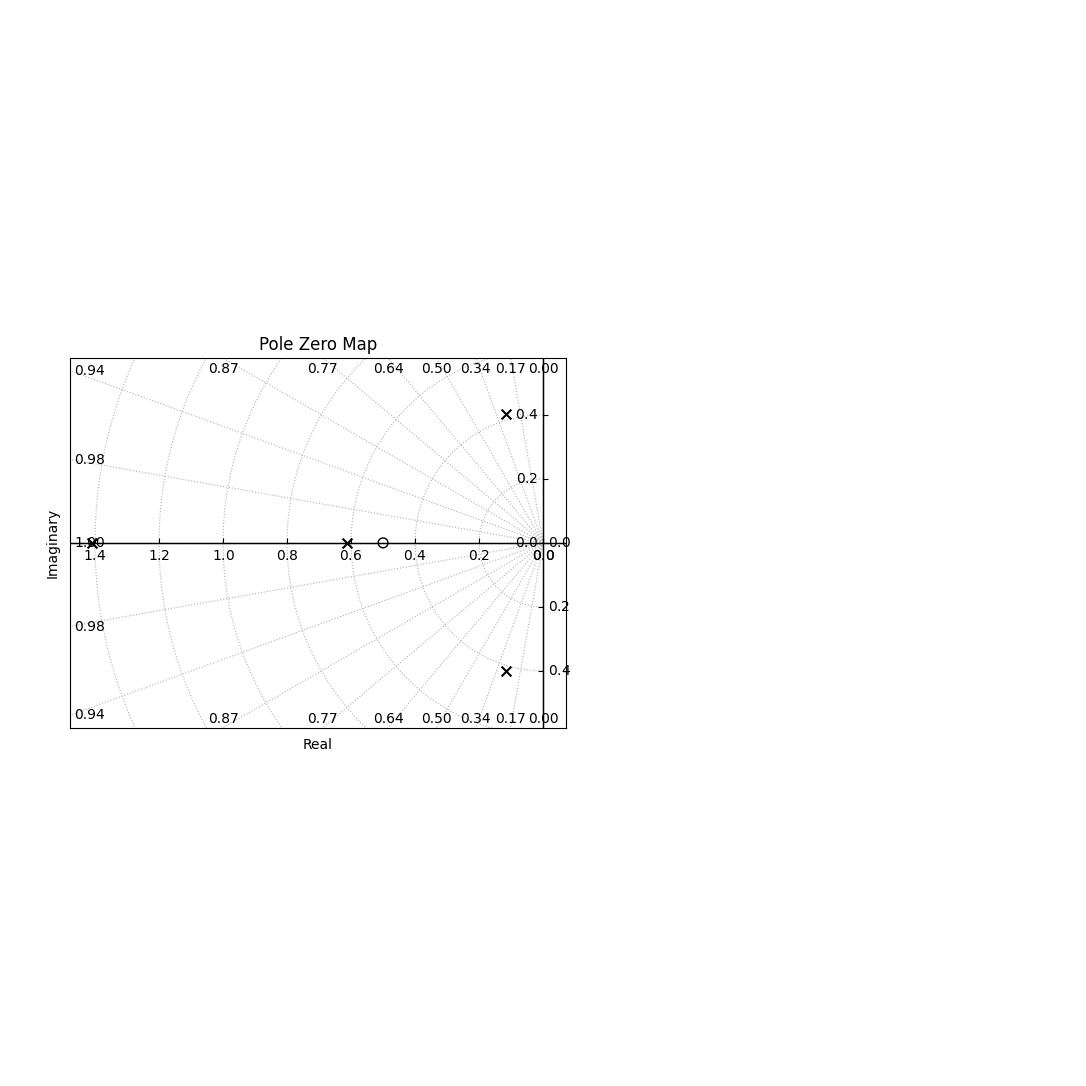

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import control as ctl

# Transfer Function of Controller
Kp = 0.4
Ti = 2
num_c = np.array([Kp*Ti, Kp])
den_c = np.array([Ti, 0])
Hc = ctl.tf(num_c,den_c)
print("Hc(s) = ", Hc)

# Transfer Function of Process
K = 3
T = 4
num_p = np.array([K])
den_p = np.array([T, 1])
Hp = ctl.tf(num_p,den_p)
print("Hp(s) = ", Hp)

# Transfer Function of Sensor
Tm = 1
num_s = np.array([1])
den_s = np.array([Tm, 1])
Hm = ctl.tf(num_s,den_s)
print("Hm(s) = ", Hm)

# Transfer Function of Low Pass Filter
Tf = 1
num_f = np.array([1])
den_f = np.array([Tf, 1])
Hf = ctl.tf(num_f,den_f)
print("Hf(s) = ", Hf)

# Transfer Function of Closed Loop System
L = ctl.series(Hc,Hp,Hm,Hf)
print("L(s) = ", L)

# Tracking the Transfer Function of Closed Loop System
T = ctl.feedback(L,1)
print("T(s) = ", T)

# Step Response of Feedback Tracking System
t, y = ctl.step_response(T)
plt.figure(1)
plt.plot(t,y)
plt.title('Step Response of Feedback Tracking System T(s)')
plt.xlabel('t[s]')
plt.ylabel('y(t)')
plt.grid()

# Bode Plot with Stability Margins
plt.figure(2)
ctl.bode(L, dB = True, Hz = True, deg = True, margins = True)

# Poles and Zeros
plt.figure(3)
ctl.pzmap(T, grid = True)
print("Poles of T(s) = ", ctl.pole(T))
print("Zeros of T(s) = ", ctl.zero(T))

# Calculating Stability Margins
# pm = phase margin, 
# w180 = frequency at phase = -180deg, 
# wc = frequency at gain = 0dB
gm, pm, w180, wc = ctl.margin(L)

# Converting gm to dB
gm_dB = 20*np.log10(gm)

print("Gain Margin = ", f'{gm:.2f}')
print("Gain Margin = ", f'{gm_dB:.2f}', "dB")
print("Phase Margin = ", f'{pm:.2f}', "deg")
print("Frequency at Phase = ", f'{w180:.2f}', "rad/s")
print("Frequency at Gain = ", f'{wc:.2f}', "rad/s")

# Finding when the system is Marginally stable
Kc = Kp*gm
print("Kc = ", f'{Kc:.2f}')

plt.show()